In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [10]:
feature=df.drop(['Exited'], axis=1)
target= df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target, test_size=0.2, random_state=12)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
xtrainscaled=sc.fit_transform(xtrain)
xtestscaled = sc.transform(xtest)

In [14]:
xtrainscaled

array([[ 0.72682704,  0.19876101,  0.68138259, ..., -0.57792762,
        -0.57003687,  0.91025899],
       [ 0.932858  , -0.2771138 , -0.7041574 , ..., -0.57792762,
        -0.57003687, -1.09858844],
       [-0.72569129,  1.05533567, -1.74331239, ..., -0.57792762,
        -0.57003687,  0.91025899],
       ...,
       [-1.27167336, -0.65781365,  0.68138259, ..., -0.57792762,
        -0.57003687, -1.09858844],
       [-1.302578  ,  0.4842859 ,  1.72053757, ..., -0.57792762,
        -0.57003687,  0.91025899],
       [ 0.80923942, -1.22886342, -0.3577724 , ...,  1.73032049,
        -0.57003687,  0.91025899]])

In [15]:
#pip install tensorflow

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

In [18]:
model.add(Dense(10, activation = 'relu', input_dim = 11))
model.add(Dense (10, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
history=model.fit(xtrainscaled, ytrain, epochs=18, validation_split=0.2)

Epoch 1/18
200/200 [==============================] - 2s 7ms/step - loss: 0.5201 - accuracy: 0.7680 - val_loss: 0.4585 - val_accuracy: 0.8019
Epoch 2/18
200/200 [==============================] - 1s 6ms/step - loss: 0.4413 - accuracy: 0.8042 - val_loss: 0.4360 - val_accuracy: 0.8069
Epoch 3/18
200/200 [==============================] - 1s 7ms/step - loss: 0.4259 - accuracy: 0.8097 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 4/18
200/200 [==============================] - 1s 5ms/step - loss: 0.4174 - accuracy: 0.8186 - val_loss: 0.4220 - val_accuracy: 0.8219
Epoch 5/18
200/200 [==============================] - 1s 7ms/step - loss: 0.4102 - accuracy: 0.8231 - val_loss: 0.4166 - val_accuracy: 0.8281
Epoch 6/18
200/200 [==============================] - 2s 11ms/step - loss: 0.4043 - accuracy: 0.8283 - val_loss: 0.4109 - val_accuracy: 0.8275
Epoch 7/18
200/200 [==============================] - 1s 6ms/step - loss: 0.3974 - accuracy: 0.8348 - val_loss: 0.4039 - val_accuracy: 0.8300
Epoch

In [22]:
history.history

{'loss': [0.520077645778656,
  0.4412742555141449,
  0.42585545778274536,
  0.41735801100730896,
  0.4102301001548767,
  0.40432754158973694,
  0.3973616659641266,
  0.39029282331466675,
  0.38229215145111084,
  0.3757461607456207,
  0.3681415915489197,
  0.3618497848510742,
  0.35686972737312317,
  0.35277554392814636,
  0.34988167881965637,
  0.3471865952014923,
  0.34530675411224365,
  0.3435753285884857],
 'accuracy': [0.7679687738418579,
  0.8042187690734863,
  0.8096874952316284,
  0.8185937404632568,
  0.8231250047683716,
  0.8282812237739563,
  0.8348437547683716,
  0.8370312452316284,
  0.842968761920929,
  0.8475000262260437,
  0.8539062738418579,
  0.8550000190734863,
  0.8587499856948853,
  0.8596875071525574,
  0.8612499833106995,
  0.8596875071525574,
  0.8623437285423279,
  0.8631250262260437],
 'val_loss': [0.4585131108760834,
  0.435970276594162,
  0.4275669753551483,
  0.4220322370529175,
  0.41663673520088196,
  0.41093865036964417,
  0.40386947989463806,
  0.3955215

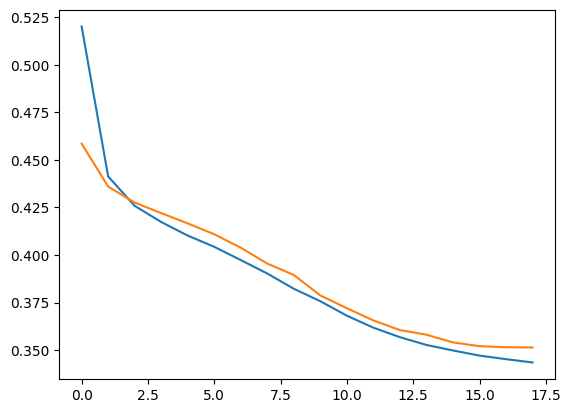

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

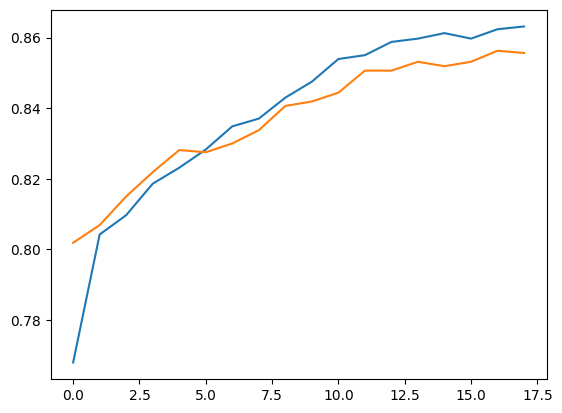

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [25]:
model.layers[0].get_weights()

[array([[-0.21466228,  0.11595375, -0.0999874 ,  0.05373632,  0.16623569,
         -0.37431872, -0.1357858 ,  0.11603434, -0.25081494,  0.37264124],
        [-0.31628957,  0.42688072, -0.60764927, -0.8746821 , -0.7020712 ,
         -0.65349066,  0.27637088,  0.11536749,  0.48624438, -0.5055537 ],
        [-0.09532367, -0.09674054, -0.06577785, -0.10129806, -0.09586563,
          0.4836653 , -0.18393181, -0.13705306,  0.34024873,  0.2824676 ],
        [ 0.07421424,  0.10284328, -0.14970215,  0.26399916, -0.39578226,
          0.34166342,  0.19765344, -0.09006798,  0.02564165,  0.36147326],
        [ 0.09286609, -0.07986534,  0.108338  ,  0.0177787 ,  0.21460672,
         -0.43068102,  1.0697353 , -1.0611687 , -0.35652104,  0.7100515 ],
        [-0.33264846,  0.19024576, -0.25232968, -0.21467927,  0.14957334,
          0.37646592,  0.01097263, -0.0989129 , -0.21135248, -0.24165238],
        [-0.04168593,  0.78153896, -0.00128004, -0.4447411 ,  0.13651532,
          0.27514613, -0.1368814

In [26]:
ypred = np.where(model.predict(xtestscaled)>=0.5,1,0)

63/63 [==============================] - 0s 4ms/step


In [27]:
ypred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(ytest, ypred)

0.8575

In [30]:
#pip install imblearn

In [31]:
from imblearn.over_sampling import SMOTE
"""counter = counter(ytrain)
print('before',counter)"""
smt = SMOTE()
xtrainsm,ytrainsm = smt.fit_resample(xtrain, ytrain)
"""counter = counter(ytrainsm)
print('after',counter)"""

"counter = counter(ytrainsm)\nprint('after',counter)"

In [32]:
ytrainsm.value_counts()

0    6399
1    6399
Name: Exited, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc= StandardScaler()
xtrainsmsc=sc.fit_transform(xtrainsm)
xtestsmsc = sc.transform(xtest)

In [35]:
model1= Sequential()
model1.add(Dense(10, activation = 'relu', input_dim = 11))
model1.add(Dense (10, activation= 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [36]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history1=model1.fit(xtrainsmsc, ytrainsm,epochs=50, validation_split=0.2)

Epoch 1/50
320/320 [==============================] - 3s 4ms/step - loss: 0.6055 - accuracy: 0.6497 - val_loss: 0.6633 - val_accuracy: 0.6848
Epoch 2/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4858 - accuracy: 0.7679 - val_loss: 0.4929 - val_accuracy: 0.7891
Epoch 3/50
320/320 [==============================] - 1s 5ms/step - loss: 0.4583 - accuracy: 0.7833 - val_loss: 0.5030 - val_accuracy: 0.7777
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.7922 - val_loss: 0.4637 - val_accuracy: 0.8012
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.8027 - val_loss: 0.4593 - val_accuracy: 0.8004
Epoch 6/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8071 - val_loss: 0.4584 - val_accuracy: 0.7937
Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8089 - val_loss: 0.4186 - val_accuracy: 0.8145
Epoch 

In [39]:
history1.history

{'loss': [0.6055020689964294,
  0.48584190011024475,
  0.4583326578140259,
  0.44107964634895325,
  0.4281310439109802,
  0.4191107153892517,
  0.41253846883773804,
  0.407535195350647,
  0.4040413796901703,
  0.40083345770835876,
  0.39826589822769165,
  0.3963013291358948,
  0.394694983959198,
  0.39291077852249146,
  0.39109793305397034,
  0.39034369587898254,
  0.38913288712501526,
  0.38890138268470764,
  0.3880380690097809,
  0.38761815428733826,
  0.38708963990211487,
  0.3862093985080719,
  0.38594767451286316,
  0.3852597773075104,
  0.3848763108253479,
  0.38491392135620117,
  0.3843156695365906,
  0.3837001919746399,
  0.38318222761154175,
  0.38294821977615356,
  0.38251978158950806,
  0.3819335997104645,
  0.3815688192844391,
  0.38180625438690186,
  0.381033718585968,
  0.3813004493713379,
  0.38132575154304504,
  0.3803320825099945,
  0.3802312910556793,
  0.3798855245113373,
  0.3796521723270416,
  0.37953490018844604,
  0.37904366850852966,
  0.37893038988113403,
  0.3

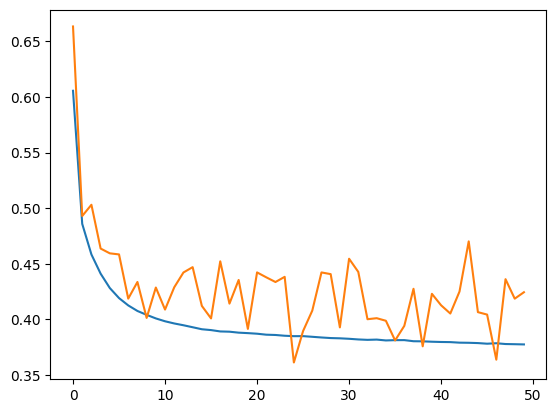

In [40]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

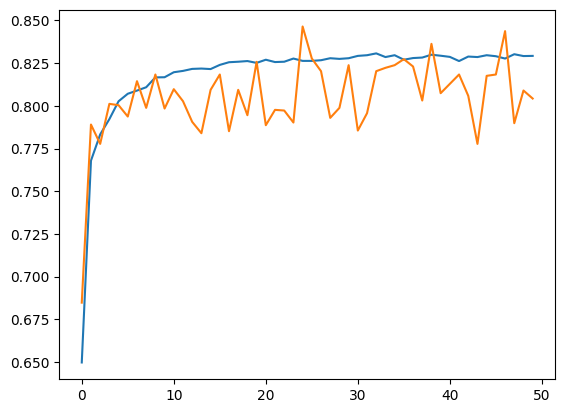

In [41]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

In [42]:
ypredsm=np.where(model1.predict(xtestsmsc)>=0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [43]:
ypredsm

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(ytest,ypredsm)

0.8325